In [2]:
credit_data_sample<- read.csv("M:\\Imarticus\\ProjectR\\Credit card fraud\\Datafiles\\credit_data_sample.csv", header = TRUE,
                              stringsAsFactors = TRUE,
                              strip.white = FALSE ,
                              sep = ',')

In [41]:
credit_data_sample$Class= as.factor(credit_data_sample$Class)
library(InformationValue)

fit = glm(Class ~ V4+V14+V17, data=credit_data_sample, family=binomial(logit))
pred = predict(fit, data= credit_data_sample, type="response")
summary(fit)



Call:
glm(formula = Class ~ V4 + V14 + V17, family = binomial(logit), 
    data = credit_data_sample)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.7997  -0.2555  -0.1636  -0.0339   3.8466  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.75043    0.17316 -21.659  < 2e-16 ***
V4           0.65587    0.07322   8.957  < 2e-16 ***
V14         -1.17514    0.09563 -12.288  < 2e-16 ***
V17         -0.21171    0.07606  -2.784  0.00538 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2230.46  on 1997  degrees of freedom
Residual deviance:  507.39  on 1994  degrees of freedom
AIC: 515.39

Number of Fisher Scoring iterations: 9


In [42]:
confusionMatrix(credit_data_sample$Class,pred>0.7)

,0,1
0,1500,72
1,6,420


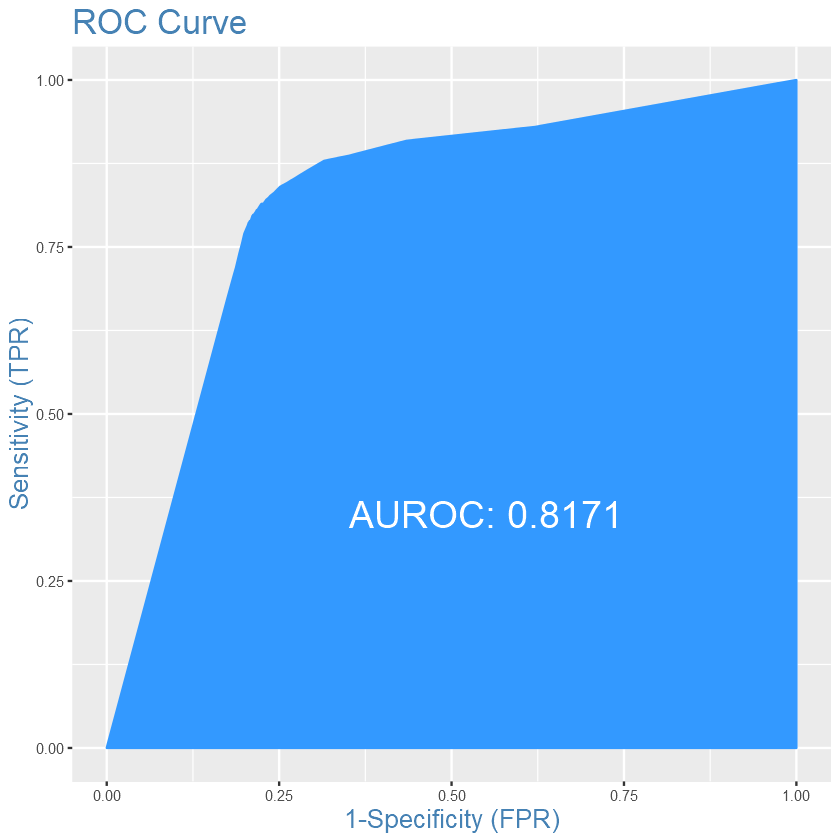

In [23]:
plotROC(credit_data_sample,pred)

In [24]:
sensitivity(credit_data_sample$Class, pred, threshold = 0.6)
specificity(credit_data_sample$Class, pred, threshold = 0.6)

[1] 0.8617886

[1] 0.9940239

In [48]:
library(caTools)
split = sample.split(credit_data_sample$Class, SplitRatio = .8)
training_data = subset(credit_data_sample, split == TRUE)
test_data = subset(credit_data_sample, split == FALSE)
nrow(test_data)

[1] 399

In [49]:
fit_train = glm(Class ~ V4+V14+V17, training_data, family=binomial)
summary(fit_train)


Call:
glm(formula = Class ~ V4 + V14 + V17, family = binomial, data = training_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.7625  -0.2580  -0.1648  -0.0434   3.8396  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.73855    0.19155 -19.518   <2e-16 ***
V4           0.64566    0.07824   8.252   <2e-16 ***
V14         -1.15890    0.10158 -11.409   <2e-16 ***
V17         -0.23285    0.08196  -2.841   0.0045 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1785.60  on 1598  degrees of freedom
Residual deviance:  414.83  on 1595  degrees of freedom
AIC: 422.83

Number of Fisher Scoring iterations: 8


In [50]:
pred_test <-predict(fit_train,test_data, type="response")


confusionMatrix(test_data$Class,pred_test>0.7)

,0,1
0,300,14
1,1,84


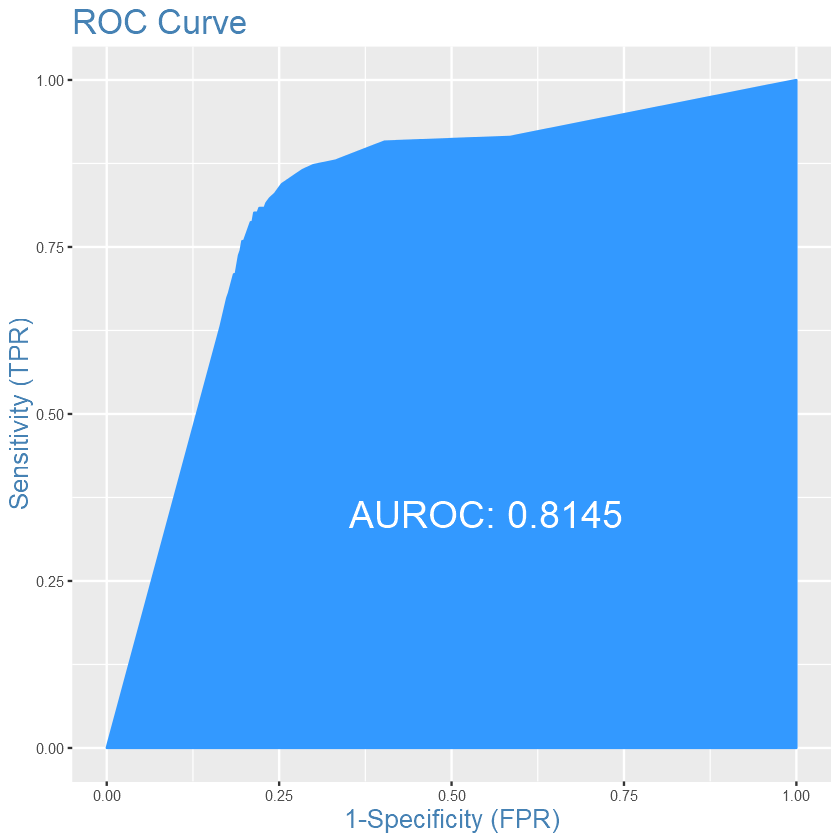

In [45]:
plotROC(test_data,pred_test)


In [46]:
sensitivity(test_data$Class, pred_test, threshold = 0.6)
specificity(test_data$Class, pred_test, threshold = 0.6)

[1] 0.8163265

[1] 0.9933555